In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_VGG

Using TensorFlow backend.


Data type changed to float32, label type changed to categorical
Standardization Data


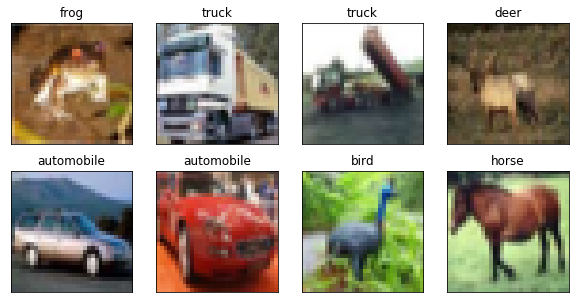

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_VGG.datasets.cifar10.load_data()


show_images(X_train_origin, Y_train_origin, 8)

(X_train, Y_train), (X_test, Y_test) = cifar_VGG_data_load(cifar10_VGG.datasets.cifar10, std_data = True)

In [3]:
cifar_model = cifar10_VGG.CifarVGG(img_shape = X_train[0].shape, class_num = Y_train.shape[1],
                                      do_batch_norm = True, do_drop = True, drop_rate = 0.5)

모델 펼처보기

In [4]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

In [5]:
history_train = cifar_model.train(X_train, Y_train, epoch = 200, 
                                  batch_size = 16, aug_data = True)
#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

Data augmentation and Train
Epoch 1/200
  17/2500 [..............................] - ETA: 1:54:36 - loss: 3.9859 - acc: 0.0882

KeyboardInterrupt: 

In [ ]:
prediction = cifar_model.predict(X_test)

In [ ]:
print(Y_test_origin[:8])
print(prediction[:8])

In [ ]:
show_images(X_test_origin, Y_test_origin, 8)

In [ ]:
show_images(X_test_origin, prediction, 8)

In [ ]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [ ]:
result = cifar_model.show_eval(X_test, Y_test, 32)

In [ ]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

In [ ]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

In [ ]:
cifar10_VGG.plot_acc(history_train)

In [ ]:
cifar10_VGG.plot_loss(history_train)

In [ ]:
history_train.history['acc'][-1]

In [ ]:
Y_prediction = prediction

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

In [ ]:
print(confusion_report(Y_test_origin, Y_prediction))

In [ ]:
np.unique(Y_test_origin)

In [ ]:
cifar_model.model.pop()
cifar_model.show_model()